In [1]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import pandas as pd
import numpy as np
import os

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 12
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 8
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


In [2]:
def source_compass(sources,date_start,date_end,window):
    avg_novelties, avg_resonances,names = [],[],[]
    
    for name in sources:
        if name == "All":
            continue
        names.append(name)
        i = pd.read_csv(os.path.join(ROOT_DIR, f"results_{window}", name + "_Results.csv"))
        i['Date'] = pd.to_datetime(i['Date'])
        df_split = i.loc[(i['Date'] >= date_start) & (i['Date'] < date_end)]
        novelty = df_split["Novelty"].to_list()
        resonance = df_split["Resonance"].to_list()
        avg_novelties.append(sum(novelty)/len(novelty))
        avg_resonances.append(sum(resonance)/len(resonance))

    avg_novelty = sum(avg_novelties)/len(avg_novelties)
    avg_resonance = sum(avg_resonances)/len(avg_resonances)

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 7)

    plt.scatter(avg_resonances,avg_novelties,marker=".",color='black')
    min_resonance, max_resonance = ax.get_xlim()
    min_novelty, max_novelty = ax.get_ylim()

    plt.plot([min_resonance,max_resonance],[(max_novelty+min_novelty)/2,(max_novelty+min_novelty)/2],'k', linestyle = ":", lw=1)
    plt.plot([(max_resonance+min_resonance)/2,(max_resonance+min_resonance)/2],[min_novelty,max_novelty],'k', linestyle = ":", lw=1)

    
    ax.set_title("Novelty X Resonance - Averages")
    ax.set_xlabel("Resonance")
    ax.set_ylabel("Novelty")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for i, txt in enumerate(names):
        ax.annotate(txt, (avg_resonances[i]+0.0005, avg_novelties[i]-0.05))

    return fig

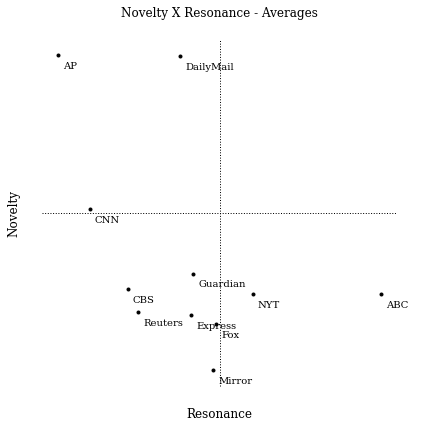

In [3]:
sources = ["ABC","AP","CBS","CNN","DailyMail","Express","Fox","Guardian","Mirror","NYT","Reuters"] # ,"All"
date_start,date_end = "03-01-2022","12-01-2022"
windows=[1]
for window in windows:
    fig = source_compass(sources,date_start,date_end,window)
    fig.savefig(os.path.join(ROOT_DIR, "figures","source_compass", f"source_compass_{window}.svg"), format="svg", dpi=1000, bbox_inches="tight")
